In [5]:
import pandas as pd

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Dataset Loading

In [6]:
df = pd.read_csv("../data/books-2024-10-04.csv")
df.head()

,Title,Author,Price,Rating,Limited Stock,Discount,Genre,Number of Pages,Weight,ISBN,Language,Related Genres,Synopsis,URL
0,The Art of Laziness: Overcome Procrastination ...,Library Mindset,Rs. 478,3.0,NaN,NaN,Arts And Photography,182 Pages,130g,9780143469124,English,"Arts and Photography:, Business and Investing:...",Do you constantly feel unmotivated to work on ...,https://booksmandala.com/books/the-art-of-lazi...
1,The Gruffalo,Julia Donaldson,Rs. 720,NaN,Only 3 item left in stock!,NaN,Arts And Photography,33 Pages,196g,9781509804757,English,"Kids and Teens:, Arts and Photography:, Kids a...",A mouse took a stroll through the deep dark wo...,https://booksmandala.com/books/the-gruffalo-12894
2,Art for kids Colouring Book-1,Dph,Rs. 125,NaN,NaN,NaN,Arts And Photography,29 Pages,100g,BMAD5790BBAADD,English,"Arts and Photography:, Kids and Teens:, Kids a...",Art for kids- Colouring book,https://booksmandala.com/books/art-for-kids-co...
3,"Gruffalo, Where Are You?: a Felt Flaps Book",Julia Donaldon,Rs. 720,NaN,Only 1 item left in stock!,NaN,Arts And Photography,10 Pages,250g,9781529023602,English,"Arts and Photography:, Kids and Teens:, Arts a...",A chunky board book with felt flaps to open on...,https://booksmandala.com/books/gruffalo-where-...
4,Unseen Extremes mapping the world's greatest m...,"Reinhold Messner,",Rs. 2560,NaN,NaN,NaN,Arts And Photography,240 Pages,2160g,9780500518892,English,"Arts and Photography:, Travel:, Arts and Photo...",Mountains marks a new milestone in Earth obser...,https://booksmandala.com/books/unseen-extremes...


In [7]:
df.describe()

,Rating,Discount
count,110.000000,0.0
mean,4.447273,NaN
std,0.762265,NaN
min,2.000000,NaN
25%,4.000000,NaN
50%,4.800000,NaN
75%,5.000000,NaN
max,5.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1040 non-null   object 
 1   Author           1040 non-null   object 
 2   Price            1040 non-null   object 
 3   Rating           110 non-null    float64
 4   Limited Stock    504 non-null    object 
 5   Discount         0 non-null      float64
 6   Genre            1040 non-null   object 
 7   Number of Pages  923 non-null    object 
 8   Weight           1040 non-null   object 
 9   ISBN             1040 non-null   object 
 10  Language         1040 non-null   object 
 11  Related Genres   1040 non-null   object 
 12  Synopsis         1038 non-null   object 
 13  URL              1040 non-null   object 
dtypes: float64(2), object(12)
memory usage: 113.9+ KB


Not much numeric data to work with

# Preprocessing

In [4]:
# show data types that are non-numeric
df.select_dtypes("object").columns

Index(['Title', 'Author', 'Price', 'Genre', 'Number of Pages', 'Weight',
       'ISBN', 'Language', 'Related Genres', 'URL'],
      dtype='object')

In [5]:
na = df.isna().sum()
na[na > 0]

Rating             758
Number of Pages     52
dtype: int64

In [6]:
df["Price"].unique()

array(['Rs. 3040', 'Rs. 3000', 'Rs. 4000', 'Rs. 1250', 'Rs. 2074',
       'Rs. 4400', 'Rs. 560', 'Rs. 784', 'Rs. 520', 'Rs. 1432',
       'Rs. 3198', 'Rs. 632', 'Rs. 952', 'Rs. 1278', 'Rs. 110',
       'Rs. 4800', 'Rs. 472', 'Rs. 1150', 'Rs. 638', 'Rs. 2900',
       'Rs. 3701', 'Rs. 1600', 'Rs. 2200', 'Rs. 1264', 'Rs. 3992',
       'Rs. 1800', 'Rs. 2400', 'Rs. 1450', 'Rs. 1000', 'Rs. 1440',
       'Rs. 792', 'Rs. 1200', 'Rs. 300', 'Rs. 2238', 'Rs. 3692',
       'Rs. 240', 'Rs. 958', 'Rs. 1118', 'Rs. 799', 'Rs. 798', 'Rs. 700',
       'Rs. 478', 'Rs. 741', 'Rs. 880', 'Rs. 360', 'Rs. 400', 'Rs. 850',
       'Rs. 572', 'Rs. 1272', 'Rs. 558', 'Rs. 1276', 'Rs. 450',
       'Rs. 1438', 'Rs. 960', 'Rs. 413', 'Rs. 1011', 'Rs. 250', 'Rs. 385',
       'Rs. 312', 'Rs. 454', 'Rs. 2878', 'Rs. 144', 'Rs. 588', 'Rs. 500',
       'Rs. 280', 'Rs. 414', 'Rs. 350', 'Rs. 50', 'Rs. 100', 'Rs. 150',
       'Rs. 993', 'Rs. 550', 'Rs. 160', 'Rs. 85', 'Rs. 456', 'Rs. 750',
       'Rs. 816', 'Rs. 200', 'Rs. 800

There aren't any values that have a decimal, so we can just replace non-digit `\D` with spaces using RegEx

In [7]:
df["Price"] = df["Price"].str.replace(r"\D", "", regex=True).astype("float")
df["Price"]

0      3040.0
1      3000.0
2      3000.0
3      4000.0
4      1250.0
        ...  
755     395.0
756     952.0
757     500.0
758     720.0
759     450.0
Name: Price, Length: 760, dtype: float64

In [8]:
df["Number of Pages"]

0      792 Pages
1            NaN
2      246 Pages
3      145 Pages
4      114 Pages
         ...    
755    102 Pages
756     96 Pages
757    218 Pages
758    235 Pages
759    216 Pages
Name: Number of Pages, Length: 760, dtype: object

The `Number of Pages` column has null values

In [9]:
df["Number of Pages"] = df["Number of Pages"][~df["Number of Pages"].isna()] \
                        .str.replace(r"\D", "", regex=True) \
                        .astype("int")
df["Number of Pages"]

0      792.0
1        NaN
2      246.0
3      145.0
4      114.0
       ...  
755    102.0
756     96.0
757    218.0
758    235.0
759    216.0
Name: Number of Pages, Length: 760, dtype: float64

In [10]:
df["Weight"].unique()

array(['1510g', '1500g', '1250g', '1060g', '890g', '480g', '960g', '215g',
       '822g', '350g', '510g', '1275g', '485g', '1620g', '850g', '100g',
       '2000g', '250g', '690g', '160g', '205g', '2360g', '645g', '1580g',
       '730g', '1700g', '1345g', '1770g', '310g', '1350g', '380g', '315g',
       '990g', '1490g', '360g', '1330g', '1730g', '80g', '390g', '300g',
       '385g', '285g', '182g', '330g', '290g', '460g', '505g', '340g',
       '305g', '155g', '210g', '255g', '670g', '180g', '260g', '244g',
       '430g', '395g', '365g', '148g', '235g', '200g', '279g', '195g',
       '410g', '295g', '120g', '236g', '230g', '355g', '500g', '190g',
       '520g', '270g', '475g', '1903g', '325g', '130g', '320g', '175g',
       '95g', '425g', '225g', '220g', '240g', '535g', '140g', '600g',
       '185g', '378g', '245g', '1680g', '525g', '420g', '167g', '1150g',
       '400g', '550g', '615g', '440g', '150g', '275g', '680g', '470g',
       '465g', '605g', '335g', '490g', '75g', '85g', '65g', 

In [11]:
df["Weight"] = df["Weight"].str.replace("g", "", regex=True).astype("int")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            760 non-null    object 
 1   Author           760 non-null    object 
 2   Price            760 non-null    float64
 3   Rating           2 non-null      float64
 4   Genre            760 non-null    object 
 5   Number of Pages  708 non-null    float64
 6   Weight           760 non-null    int64  
 7   ISBN             760 non-null    object 
 8   Language         760 non-null    object 
 9   Related Genres   760 non-null    object 
 10  URL              760 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 65.4+ KB


In [13]:
df["Language"].unique()

array(['English', 'Japanese', 'French', 'German', 'Nepali', 'Hindi',
       'Russian'], dtype=object)

## Null values

In [14]:
na[na > 0]

Rating             758
Number of Pages     52
dtype: int64

In [15]:
df.shape[0]

760

In [16]:
df.drop("Rating", inplace=True, axis=1)

In [17]:
na = df.isna().sum()
na[na > 0]

Number of Pages    52
dtype: int64

In [18]:
df["Number of Pages"].isna().sum() / df.shape[0]

0.06842105263157895

In [21]:
df.dropna(inplace=True)

In [22]:
na = df.isna().sum()
na[na > 0]

Series([], dtype: int64)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            708 non-null    object 
 1   Author           708 non-null    object 
 2   Price            708 non-null    float64
 3   Genre            708 non-null    object 
 4   Number of Pages  708 non-null    float64
 5   Weight           708 non-null    int64  
 6   ISBN             708 non-null    object 
 7   Language         708 non-null    object 
 8   Related Genres   708 non-null    object 
 9   URL              708 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 60.8+ KB


# Exploratory Analysis and Visualizations

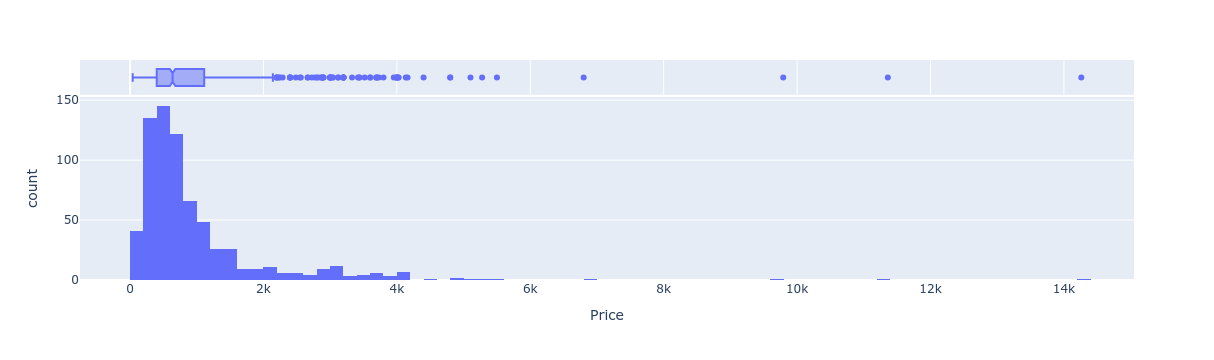

In [27]:
fig = px.histogram(df, x="Price", marginal="box")
fig.show()